In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 加载数据
file_path_train = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\KDDTrain+.txt"
file_path_test = r"D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\KDDTest+.txt"
# 定义列名
data_columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
                "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
                "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
                "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
                "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
                "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
                "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
                "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
                "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "label", "difficulty"]
# 加载数据
train_data = pd.read_csv(file_path_train, header=None, names=data_columns)
test_data = pd.read_csv(file_path_test, header=None, names=data_columns)

In [3]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [5]:
attack_mapping = {}
with open(r'D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD\attack_name',
          'r') as file:
    for line in file:
        parts = line.strip().split(' ')
        if len(parts) == 2:
            attack, category = parts
            attack_mapping[attack] = category
# 然后像之前那样使用这个映射字典
train_data['label'] = train_data['label'].map(attack_mapping)
test_data['label'] = test_data['label'].map(attack_mapping)

In [5]:
from collections import Counter
print(f'train_label is {Counter(train_data["label"])}')
print(f'test_label is {Counter(test_data["label"])}')

train_label is Counter({'normal': 67343, 'neptune': 41214, 'satan': 3633, 'ipsweep': 3599, 'portsweep': 2931, 'smurf': 2646, 'nmap': 1493, 'back': 956, 'teardrop': 892, 'warezclient': 890, 'pod': 201, 'guess_passwd': 53, 'buffer_overflow': 30, 'warezmaster': 20, 'land': 18, 'imap': 11, 'rootkit': 10, 'loadmodule': 9, 'ftp_write': 8, 'multihop': 7, 'phf': 4, 'perl': 3, 'spy': 2})
test_label is Counter({'normal': 9711, 'neptune': 4657, 'guess_passwd': 1231, 'mscan': 996, 'warezmaster': 944, 'apache2': 737, 'satan': 735, 'processtable': 685, 'smurf': 665, 'back': 359, 'snmpguess': 331, 'saint': 319, 'mailbomb': 293, 'snmpgetattack': 178, 'portsweep': 157, 'ipsweep': 141, 'httptunnel': 133, 'nmap': 73, 'pod': 41, 'buffer_overflow': 20, 'multihop': 18, 'named': 17, 'ps': 15, 'sendmail': 14, 'xterm': 13, 'rootkit': 13, 'teardrop': 12, 'xlock': 9, 'land': 7, 'xsnoop': 4, 'ftp_write': 3, 'loadmodule': 2, 'worm': 2, 'perl': 2, 'sqlattack': 2, 'udpstorm': 2, 'phf': 2, 'imap': 1})


In [6]:
# 获取训练集和测试集中的 'service' 列
service_train = train_data['service']
service_test = test_data['service']

protocol_type_train = train_data['protocol_type']
protocol_type_test = test_data['protocol_type']

flag_train = train_data['flag']
flag_test = test_data['flag']

label_train = train_data['label']
label_test = test_data['label']

# 找出只在训练集中出现的 service 类型
unique_service = set(service_train) - set(service_test)
unique_protocol_type = set(protocol_type_train) - set(protocol_type_test)
unique_flag = set(flag_train) - set(flag_test)
unique_label = set(label_train) - set(label_test)

test_unique_service = set(service_test) - set(service_train)
test_unique_protocol_type = set(protocol_type_test) - set(protocol_type_train)
test_unique_flag = set(flag_test) - set(flag_train)
test_unique_label = set(label_test) - set(label_train)
print('service type in train_dataset:', set(service_train))
print('protocol type in train_dataset:', set(protocol_type_train))
print('flag type in train_dataset:', set(flag_train))
print('label type in train_dataset:', set(label_train))
print("-------------------------------------------------------")
print('service type in test_dataset:', set(service_test))
print('protocol type in test_dataset:', set(protocol_type_test))
print('flag type in test_dataset:', set(flag_test))
print('label type in test_dataset:', set(label_test))
print("****************************************************************************************")
print("****************************************************************************************")
# 输出结果
print("service type only exist in train_dataset:", unique_service)
print("protocol type only exist in train_dataset:", unique_protocol_type)
print("flag type only exist in train_dataset:", unique_flag)
print("label type only exist in train_dataset:", unique_label)
print("-------------------------------------------------------")
print("service type only exist in test_dataset:", test_unique_service)
print("protocol type only exist in test_dataset:", test_unique_protocol_type)
print("flag type only exist in test_dataset:", test_unique_flag)
print("label type only exist in test_dataset:", test_unique_label)

service type in train_dataset: {'uucp_path', 'auth', 'supdup', 'klogin', 'domain_u', 'gopher', 'echo', 'sql_net', 'netstat', 'hostnames', 'ecr_i', 'ldap', 'vmnet', 'ftp_data', 'sunrpc', 'kshell', 'ssh', 'tftp_u', 'http_443', 'netbios_ns', 'discard', 'systat', 'shell', 'http_8001', 'http_2784', 'remote_job', 'eco_i', 'imap4', 'csnet_ns', 'pop_3', 'ctf', 'urp_i', 'pm_dump', 'ftp', 'link', 'ntp_u', 'name', 'whois', 'other', 'domain', 'login', 'Z39_50', 'printer', 'exec', 'aol', 'telnet', 'IRC', 'X11', 'bgp', 'private', 'netbios_ssn', 'mtp', 'efs', 'tim_i', 'finger', 'http', 'rje', 'uucp', 'daytime', 'red_i', 'pop_2', 'iso_tsap', 'nnsp', 'urh_i', 'netbios_dgm', 'harvest', 'courier', 'time', 'nntp', 'smtp'}
protocol type in train_dataset: {'icmp', 'tcp', 'udp'}
flag type in train_dataset: {'S1', 'SH', 'RSTR', 'S3', 'S0', 'RSTO', 'RSTOS0', 'S2', 'SF', 'REJ', 'OTH'}
label type in train_dataset: {'back', 'buffer_overflow', 'land', 'smurf', 'ftp_write', 'nmap', 'loadmodule', 'satan', 'warezclie

In [8]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [9]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,dos,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,probe,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,probe,11


In [10]:
# 定义要检查的服务类型列表
services_to_check = ['urh_i', 'http_2784', 'aol', 'http_8001', 'harvest', 'red_i']

# 对每种服务类型进行计数
for service in services_to_check:
    count = (train_data['service'] == service).sum()
    print(f"Number of occurrences for service '{service}': {count}")

Number of occurrences for service 'urh_i': 10
Number of occurrences for service 'http_2784': 1
Number of occurrences for service 'aol': 2
Number of occurrences for service 'http_8001': 2
Number of occurrences for service 'harvest': 2
Number of occurrences for service 'red_i': 8


In [11]:
from sklearn.model_selection import train_test_split
# 合并数据集
combined_data = pd.concat([train_data, test_data], axis=0)
combined_data.drop(['difficulty'],axis=1,inplace=True)

In [12]:
# normalizing data
# selecting numeric attributes columns from data
numeric_col = combined_data.select_dtypes(include='number').columns

In [13]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [14]:
combined_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [15]:
# calling the normalization() function
combined_data = normalization(combined_data.copy(),numeric_col)

In [16]:
combined_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.112481,tcp,ftp_data,SF,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.849240,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,normal
1,-0.112481,udp,other,SF,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-1.065006,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal
2,-0.112481,tcp,private,S0,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.840250,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,dos
3,-0.112481,tcp,http,SF,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,...,1.218511,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,normal
4,-0.112481,tcp,http,SF,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,...,1.218511,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,normal


In [17]:
cf = ['protocol_type','service','flag']

In [18]:
categorical = combined_data[cf]
categorical.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [19]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=cf)
categorical = categorical.astype(int)
categorical.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [20]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = combined_data.copy()
multi_label = pd.DataFrame(multi_data.label)

In [21]:
# label encoding (0,1,2,3,4) multi-class labels (Dos,normal,Probe,R2L,U2R)
le = preprocessing.LabelEncoder()
enc_label = multi_label.apply(le.fit_transform)
multi_data['enc_label'] = enc_label

In [22]:
le.classes_

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

In [23]:
# one-hot-encoding attack label
multi_data = pd.get_dummies(multi_data,columns=['label'],prefix="",prefix_sep="")
for column in ['dos', 'normal', 'probe', 'r2l', 'u2r']:
    multi_data[column] = multi_data[column].astype(int)
multi_data['label'] = multi_label
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,enc_label,dos,normal,probe,r2l,u2r,label
0,-0.112481,tcp,ftp_data,SF,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.584813,-0.267151,-0.406815,1,0,1,0,0,0,normal
1,-0.112481,udp,other,SF,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.584813,-0.422074,-0.406815,1,0,1,0,0,0,normal
2,-0.112481,tcp,private,S0,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,...,1.742295,-0.422074,-0.406815,0,1,0,0,0,0,dos
3,-0.112481,tcp,http,SF,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.561542,-0.422074,-0.376989,1,0,1,0,0,0,normal
4,-0.112481,tcp,http,SF,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.584813,-0.422074,-0.406815,1,0,1,0,0,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.112481,tcp,smtp,SF,-0.007290,-0.004524,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.584813,-0.422074,-0.406815,1,0,1,0,0,0,normal
22540,-0.112481,tcp,http,SF,-0.007378,-0.004361,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.584813,-0.422074,-0.406815,1,0,1,0,0,0,normal
22541,-0.112481,tcp,http,SF,0.002646,-0.002369,-0.01468,-0.085488,-0.010403,0.899396,...,-0.584813,-0.205182,-0.198035,0,1,0,0,0,0,dos
22542,-0.112481,udp,domain_u,SF,-0.007429,-0.004603,-0.01468,-0.085488,-0.010403,-0.094071,...,-0.584813,-0.422074,-0.406815,1,0,1,0,0,0,normal


In [24]:
# creating a dataframe with only numeric attributes of multi-class dataset and encoded label attribute 
numeric_multi = multi_data[numeric_col]
numeric_multi['enc_label'] = multi_data['enc_label']
numeric_multi.drop(['num_outbound_cmds'],axis=1,inplace=True)
numeric_multi

C:\Users\23076\AppData\Local\Temp\ipykernel_28108\2814309149.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi['enc_label'] = multi_data['enc_label']
C:\Users\23076\AppData\Local\Temp\ipykernel_28108\2814309149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_multi.drop(['num_outbound_cmds'],axis=1,inplace=True)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,enc_label
0,-0.112481,-0.007346,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.849240,-0.813554,-0.278736,0.077981,-0.280650,-0.597720,-0.584813,-0.267151,-0.406815,1
1,-0.112481,-0.007409,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-1.065006,-1.192968,2.657874,2.378421,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,1
2,-0.112481,-0.007436,-0.004614,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,-0.840250,-0.969783,-0.175697,-0.472829,-0.280650,1.736012,1.742295,-0.422074,-0.406815,0
3,-0.112481,-0.007394,-0.002413,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,1.218511,1.038878,-0.433294,-0.375627,0.086408,-0.527708,-0.561542,-0.422074,-0.376989,1
4,-0.112481,-0.007400,-0.004501,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,1.218511,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.112481,-0.007290,-0.004524,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,0.193625,0.413961,-0.124178,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,1
22540,-0.112481,-0.007378,-0.004361,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,1.217658,-0.011473,...,1.218511,1.038878,-0.433294,-0.440428,-0.188885,-0.574382,-0.584813,-0.422074,-0.406815,1
22541,-0.112481,0.002646,-0.002369,-0.01468,-0.085488,-0.010403,0.899396,-0.059832,1.217658,0.033509,...,1.218511,1.038878,-0.433294,-0.472829,-0.280650,-0.597720,-0.584813,-0.205182,-0.198035,0
22542,-0.112481,-0.007429,-0.004603,-0.01468,-0.085488,-0.010403,-0.094071,-0.059832,-0.821249,-0.011473,...,1.191540,1.016560,-0.381775,-0.472829,-0.280650,-0.597720,-0.584813,-0.422074,-0.406815,1


In [25]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = numeric_multi.corr()
corr_y = abs(corr['enc_label'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

same_srv_rate               0.559871
dst_host_serror_rate        0.592442
srv_serror_rate             0.592675
serror_rate                 0.592722
dst_host_srv_serror_rate    0.595231
enc_label                   1.000000
Name: enc_label, dtype: float64

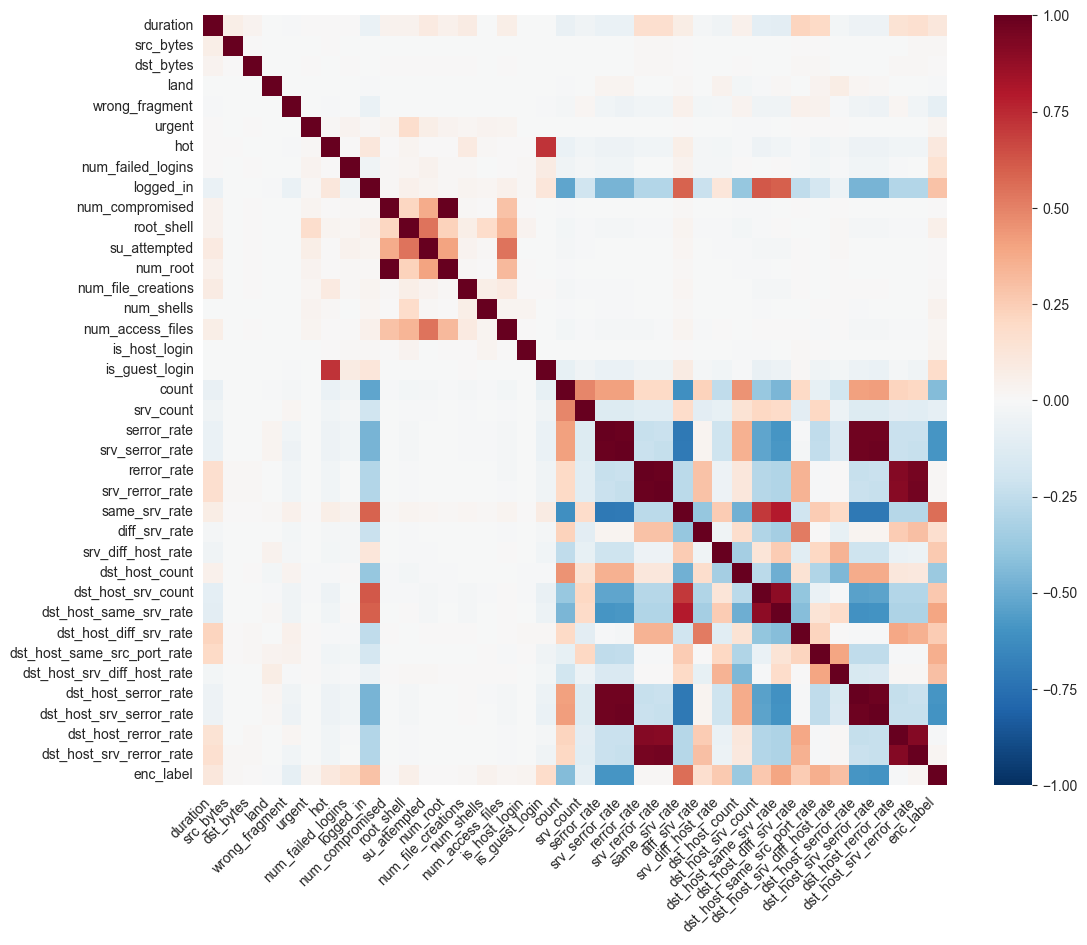

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设这里的numeric_multi是一个已经存在的DataFrame，并且包含数值型数据
# corr = numeric_multi.corr()

# 为了演示，我们可以创建一个示例的相关性矩阵
# 请用你的实际数据替换下面的代码
import numpy as np

# 设置一个较大的图形尺寸，以便于查看
plt.figure(figsize=(12, 10))

# 创建一个没有注释且以红色渐变表示的热图
# annot=False 代表不显示每个单元格的数值
# cmap='Reds' 使用红色的颜色渐变
sns.heatmap(corr, annot=False, fmt='.2f', cmap='RdBu_r', center=0, vmin=-1, vmax=1)
# 调整x轴和y轴的标签，使其更易读
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 显示图形
plt.show()

C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited at iteration 541 with accuracies 
[2.11590046e-14 2.56638092e-06 2.57599135e-07 1.70124697e-06]
not reaching the requested tolerance 1.9073486328125e-06.
Use iteration 541 instead with accuracy 
1.1313067617239393e-06.

  _, diffusion_map = lobpcg(
C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_spectral_embedding.py:392: UserWarning: Exited postproc

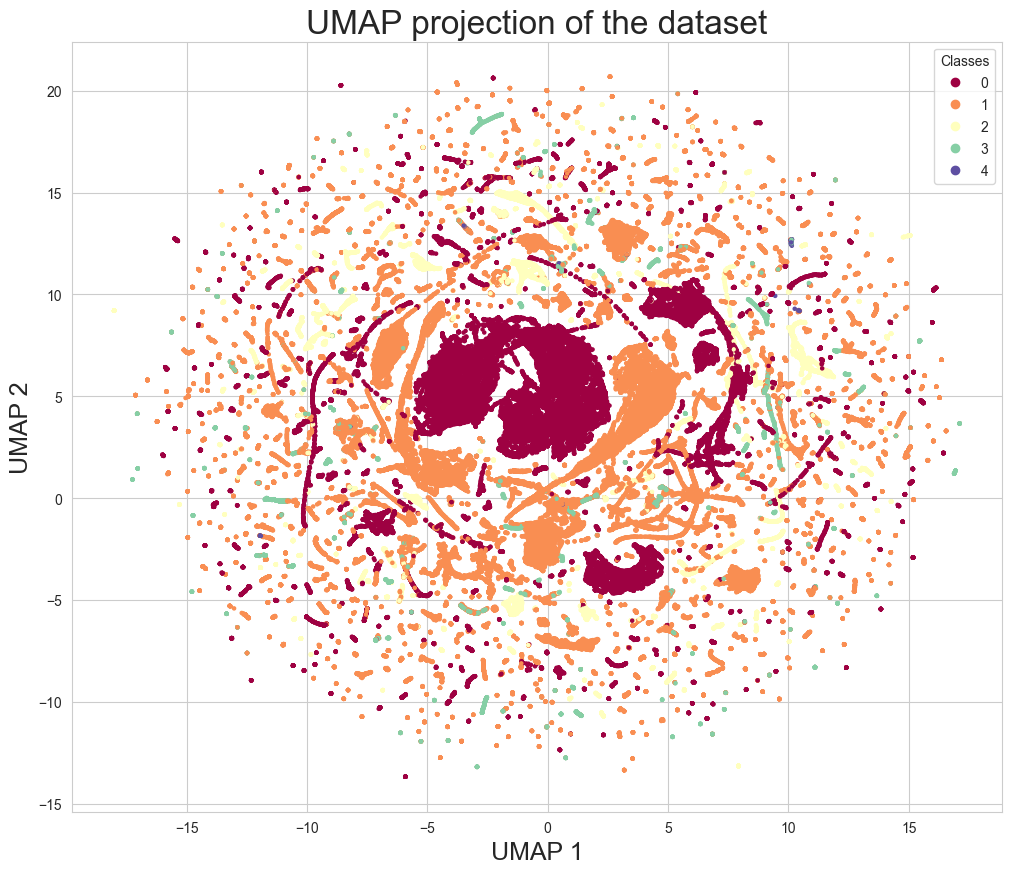

In [29]:
import umap
import matplotlib.pyplot as plt

# 假设data是你的DataFrame
# 分离特征和标签
X = numeric_multi.iloc[:, :-1].values  # 特征数据
y = numeric_multi.iloc[:, -1].values   # 标签数据，已经是编码后的
# UMAP降维
reducer = umap.UMAP(random_state=42)
X_reduced = reducer.fit_transform(X)
# 可视化
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Spectral', s=5)
plt.title('UMAP projection of the dataset', fontsize=24)
plt.xlabel('UMAP 1', fontsize=18)
plt.ylabel('UMAP 2', fontsize=18)

# 添加颜色条说明
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


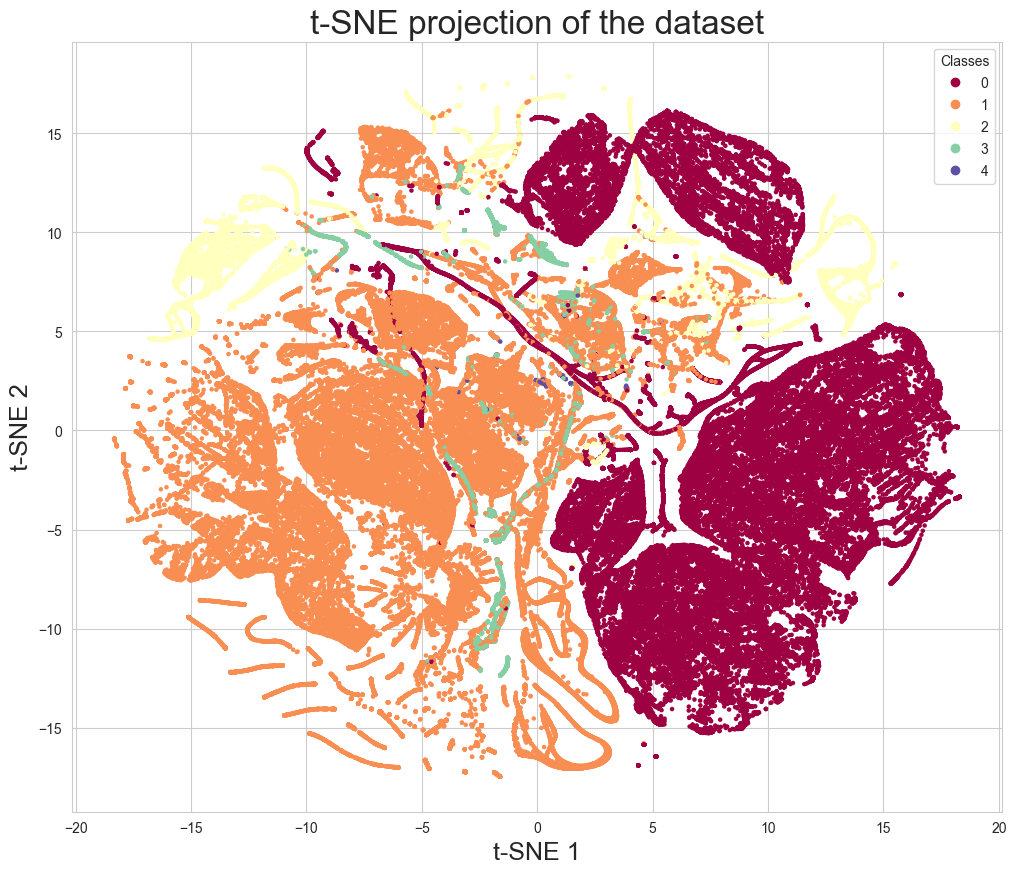

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# 初始化t-SNE，可以通过调整perplexity和n_iter参数优化结果
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)

# 对特征数据X应用t-SNE降维
X_reduced_tsne = tsne.fit_transform(X)
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='Spectral', s=5)
plt.title('t-SNE projection of the dataset', fontsize=24)
plt.xlabel('t-SNE 1', fontsize=18)
plt.ylabel('t-SNE 2', fontsize=18)

# 使用plt.legend()添加图例
# 自动生成图例标签和颜色
plt.legend(*scatter.legend_elements(), title="Classes")

plt.show()

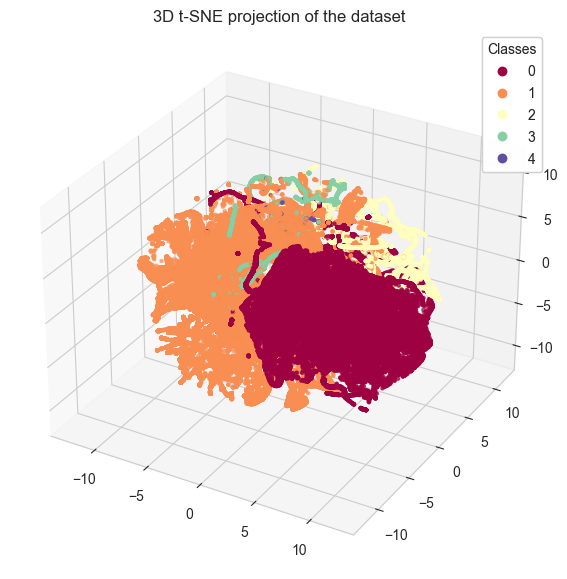

In [31]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 使用t-SNE进行三维降维
tsne = TSNE(n_components=3, perplexity=30, n_iter=300, random_state=42)
X_reduced_tsne_3d = tsne.fit_transform(X)

# 三维可视化
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 根据标签绘制不同颜色
scatter = ax.scatter(X_reduced_tsne_3d[:, 0], X_reduced_tsne_3d[:, 1], X_reduced_tsne_3d[:, 2], c=y, cmap='Spectral', s=5)

# 添加图例
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

plt.title('3D t-SNE projection of the dataset')
plt.show()

C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


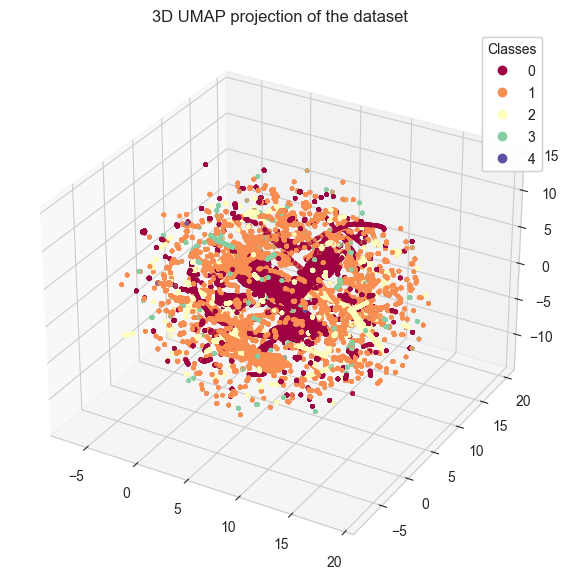

In [32]:
import umap
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 使用UMAP进行三维降维
reducer = umap.UMAP(n_components=3, random_state=42)
X_reduced_umap_3d = reducer.fit_transform(X)

# 三维可视化
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 根据标签绘制不同颜色
scatter = ax.scatter(X_reduced_umap_3d[:, 0], X_reduced_umap_3d[:, 1], X_reduced_umap_3d[:, 2], c=y, cmap='Spectral', s=5)

# 添加图例
legend = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend)

plt.title('3D UMAP projection of the dataset')
plt.show()

In [26]:
numeric_multi = multi_data[['same_srv_rate','dst_host_serror_rate','srv_serror_rate','serror_rate','dst_host_srv_serror_rate']]

In [27]:
# joining the selected attribute with the one-hot-encoded categorical dataframe
numeric_multi = numeric_multi.join(categorical)
# then joining encoded, one-hot-encoded, and original attack label attribute
multi_data = numeric_multi.join(multi_data[['enc_label','dos','probe','r2l','u2r','normal','label']])

In [28]:
# saving final dataset to disk
# multi_data.to_csv(r'D:\Download\zyFile\Cyberthreat_Cognitive_System\CTCS_Code\attack_datasets\NSL-KDD')

# final dataset for multi-class classification
multi_data

,same_srv_rate,dst_host_serror_rate,srv_serror_rate,serror_rate,dst_host_srv_serror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,...,flag_S3,flag_SF,flag_SH,enc_label,dos,probe,r2l,u2r,normal,label
0,0.749108,-0.597720,-0.590270,-0.594848,-0.584813,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,normal
0,0.749108,-0.597720,-0.590270,-0.594848,-0.584813,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,dos
0,0.749108,-0.597720,-0.590270,-0.594848,-0.584813,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,normal
0,0.749108,-0.597720,-0.590270,-0.594848,-0.584813,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,dos
0,-1.449992,-0.597720,-0.590270,-0.594848,-0.584813,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-1.220919,1.736012,1.721459,1.720415,1.742295,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,dos
125969,0.749108,-0.597720,-0.590270,-0.594848,-0.584813,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,normal
125970,0.749108,1.082567,-0.590270,-0.594848,-0.584813,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,normal
125971,-1.404177,1.736012,1.721459,1.720415,1.742295,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,dos


In [29]:
import umap
import matplotlib.pyplot as plt

# 假设data是你的DataFrame
# 分离特征和标签
X = multi_data.iloc[:,0:89].values # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = multi_data['enc_label'].values # target attribute
# UMAP降维
reducer = umap.UMAP(random_state=42)
X_reduced = reducer.fit_transform(X)
# 可视化
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='Spectral', s=5)
plt.title('UMAP projection of the dataset', fontsize=24)
plt.xlabel('UMAP 1', fontsize=18)
plt.ylabel('UMAP 2', fontsize=18)

# 添加颜色条说明
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()


C:\Users\23076\anaconda3\envs\tensorflow\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


NameError: name 'y' is not defined

<Figure size 1200x1000 with 0 Axes>

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
# 初始化t-SNE，可以通过调整perplexity和n_iter参数优化结果
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)

# 对特征数据X应用t-SNE降维
X_reduced_tsne = tsne.fit_transform(X)
plt.figure(figsize=(12, 10))
scatter = plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap='Spectral', s=5)
plt.title('t-SNE projection of the dataset', fontsize=24)
plt.xlabel('t-SNE 1', fontsize=18)
plt.ylabel('t-SNE 2', fontsize=18)

# 使用plt.legend()添加图例
# 自动生成图例标签和颜色
plt.legend(*scatter.legend_elements(), title="Classes")

plt.show()

In [39]:
X = multi_data.iloc[:,0:89].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = multi_data['enc_label'] # target attribute

In [40]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [41]:
# importing required libraries
import numpy as np
import pandas as pd

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# representation of model layers
from keras.utils.vis_utils import plot_model

In [ ]:
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

In [ ]:
y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

In [ ]:
print(classification_report(y_test, y_pred,target_names=le.classes_))

In [ ]:
print("Mean Absolute Error - " , metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error - " , metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error - " , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score - " , metrics.explained_variance_score(y_test, y_pred)*100)
print("Accuracy - ",accuracy_score(y_test,y_pred)*100)

In [27]:
from sklearn.svm import SVC
import time

# 初始化SVC模型
svc = SVC(kernel='rbf', class_weight='balanced', C=0.5)

# 训练模型
start = time.time()
# clf = svc.fit(standard_train_X, labels_train)  # 使用全部数据进行训练
clf = svc.fit(FINAL_TRAIN, labels_train)  # 使用全部数据进行训练
print('训练用时：{0}'.format(time.time() - start))

# 保存模型（如果需要）
# joblib.dump(clf, './model/IDS_model_full_data.m')
# print('Model saved')


训练用时：411.5370750427246


In [28]:
MODEL = clf

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
# 使用测试集进行预测
y_pred = clf.predict(FINAL_TEST)

accuracy = np.mean(y_pred == labels_test)
print(f'accuracy is {accuracy}')

accuracy is 0.7773243435060326


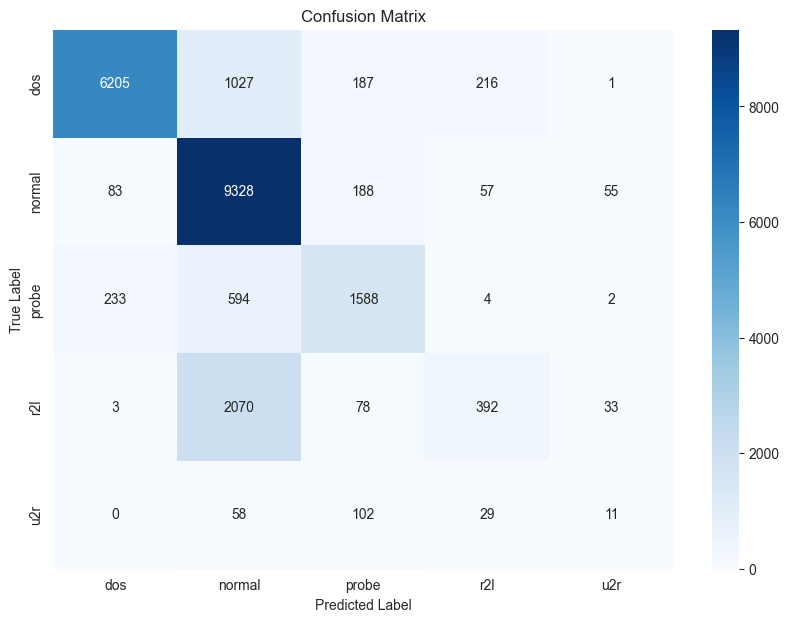

In [30]:
# 生成混淆矩阵
conf_matrix = confusion_matrix(labels_test, y_pred)
# 获取类别名称（假设 label_mapping 是之前保存的映射）
class_names = label_mapping
# 可视化混淆矩阵
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

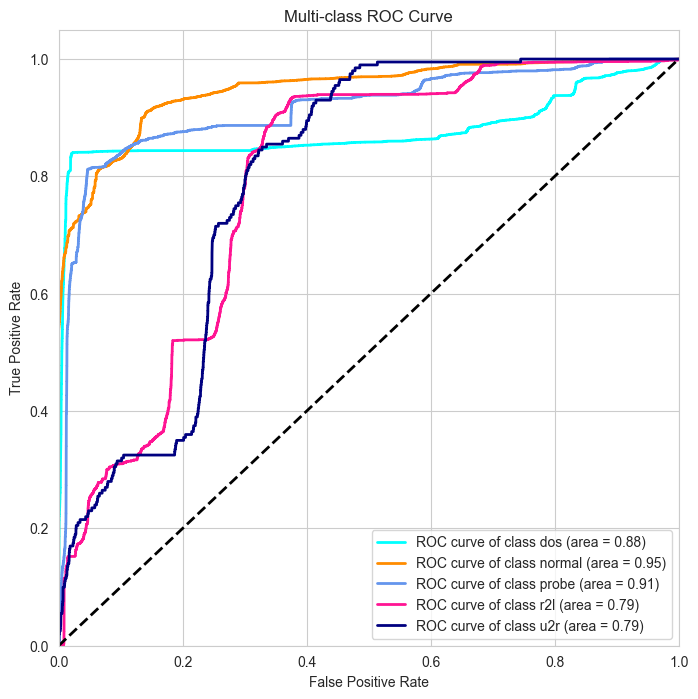

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.preprocessing import label_binarize

# 获取测试集上的决策函数得分
y_score = clf.decision_function(FINAL_TEST)

# 为每个类别进行one-hot编码
y_test_binarized = label_binarize(labels_test, classes=np.unique(labels_train))

# 计算ROC曲线和ROC面积
n_classes = y_test_binarized.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘制所有类别的ROC曲线
plt.figure(figsize=(8, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink', 'navy'])  # 五种颜色

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(class_names[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 计算精度、召回率和F1分数
recall = recall_score(labels_test, y_pred, average='weighted')
precision = precision_score(labels_test, y_pred, average='weighted')
f1 = f1_score(labels_test, y_pred, average='weighted')

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# 定义MCC分数计算函数
def mcc_score(y_true, y_pred, class_label):
    cm = confusion_matrix(y_true, y_pred)
    tp = cm[class_label, class_label]
    tn = np.sum(cm) - np.sum(cm[class_label, :]) - np.sum(cm[:, class_label]) + tp
    fp = np.sum(cm[:, class_label]) - tp
    fn = np.sum(cm[class_label, :]) - tp
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return numerator / denominator if denominator != 0 else 0

# 计算每个类别的MCC并求平均
n_classes = len(np.unique(labels_test))  # 确定类别数
mcc_scores = [mcc_score(labels_test, y_pred, i) for i in range(n_classes)]
average_mcc = np.mean(mcc_scores)

print(f"Average MCC: {average_mcc}")

Recall: 0.7773243435060326
Precision: 0.7741252210422118
F1 Score: 0.7522447196043452
Average MCC: 0.4964334629183563


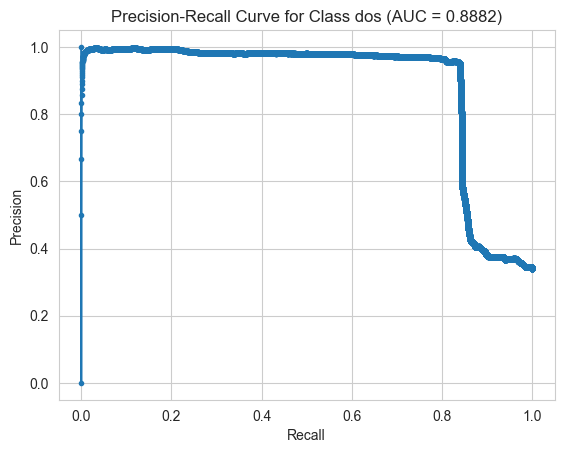

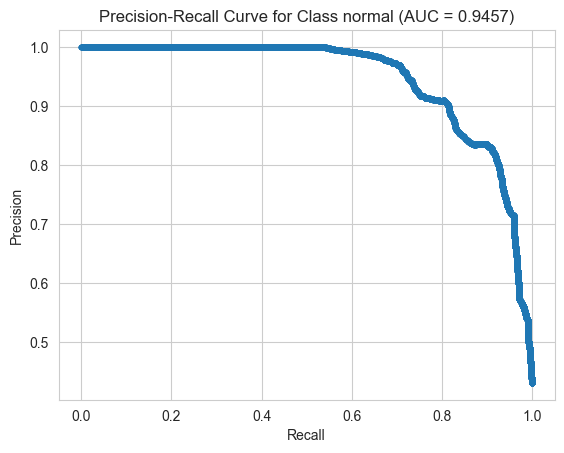

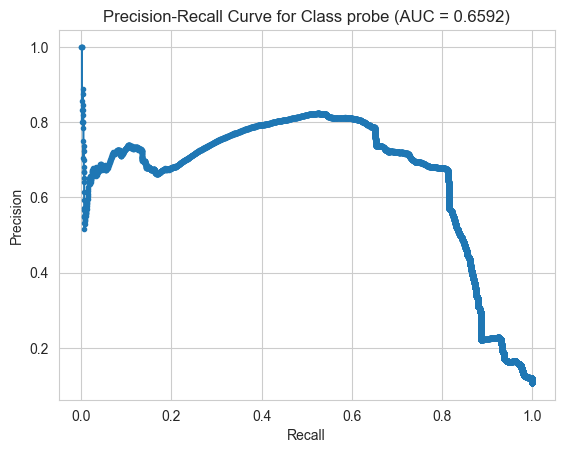

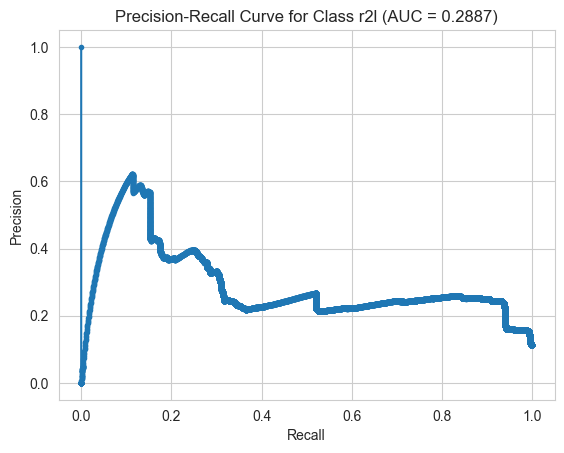

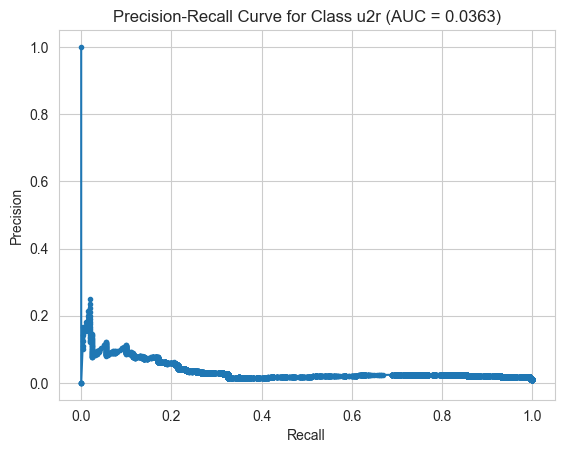

In [33]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np


# 将真实标签转换为 one-hot 编码
y_true_bin = label_binarize(labels_test, classes=np.unique(labels_train))

# 确定类别数和类别名称
n_classes = y_true_bin.shape[1]
class_names = label_mapping  # 确保类别名称正确

# 为每个类别绘制PR曲线
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_score[:, i])
    auc_score = auc(recall, precision)

    plt.figure()
    plt.plot(recall, precision, marker='.')
    plt.title('Precision-Recall Curve for Class {} (AUC = {:.4f})'.format(class_names[i], auc_score))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()